### Informações a cerca da base de dados do projeto:

A base de dados contém **2.624 imagens de células FVs de 300 x 300 pixels em níveis de cinza (8 bits)**, sendo 1.074 imagens de células de silício monocristalino e 1.550 imagens de células de silício policristalino, extraídas de 44 módulos FVs diferentes.

Cada imagem foi rotulada com um número de ponto flutuante que caracteriza a probabilidade de defeito da mesma, podendo variar entre 0 e 1, onde:

0 - célula FV sem probabilidade de defeito
1 - célula FV com alto grau de probabilidade de defeito.

As células são divididas em ``mono`` e ``poly``, representando as células de silício monocristalino e policristalino respectivamente.

Pode-se verificar qual tipo de célula estamos trabalhando através do arquivo ``labels.csv``. Neste arquivo, constam as seguintes informações:

- nome da imagem (Ex: cell236.png)
- grau de defeito (0.0, 1.0, 0.333, 0.666)
- tipo de célula (mono ou poly)

### Autores que disponibilizaram a base (Citação):

> Buerhop-Lutz, C.; Deitsch, S.; Maier, A.; Gallwitz, F.; Berger, S.; Doll, B.; Hauch, J.; Camus, C. & Brabec, C. J. A Benchmark for Visual Identification of Defective Solar Cells in Electroluminescence Imagery. European PV Solar Energy Conference and Exhibition (EU PVSEC), 2018. DOI: [10.4229/35thEUPVSEC20182018-5CV.3.15](http://dx.doi.org/10.4229/35thEUPVSEC20182018-5CV.3.15)

> Deitsch, S., Buerhop-Lutz, C., Sovetkin, E., Steland, A., Maier, A., Gallwitz, F., & Riess, C. (2021). Segmentation of photovoltaic module cells in uncalibrated electroluminescence images. Machine Vision and Applications, 32(4). DOI: [10.1007/s00138-021-01191-9](https://doi.org/10.1007/s00138-021-01191-9)

> Deitsch, S.; Christlein, V.; Berger, S.; Buerhop-Lutz, C.; Maier, A.; Gallwitz, F. & Riess, C. Automatic classification of defective photovoltaic module cells in electroluminescence images. Solar Energy, Elsevier BV, 2019, 185, 455-468. DOI: [10.1016/j.solener.2019.02.067](http://dx.doi.org/10.1016/j.solener.2019.02.067)

BibTeX details:

<details>

```bibtex

@InProceedings{Buerhop2018,
  author    = {Buerhop-Lutz, Claudia and Deitsch, Sergiu and Maier, Andreas and Gallwitz, Florian and Berger, Stephan and Doll, Bernd and Hauch, Jens and Camus, Christian and Brabec, Christoph J.},
  title     = {A Benchmark for Visual Identification of Defective Solar Cells in Electroluminescence Imagery},
  booktitle = {European PV Solar Energy Conference and Exhibition (EU PVSEC)},
  year      = {2018},
  eventdate = {2018-09-24/2018-09-28},
  venue     = {Brussels, Belgium},
  doi       = {10.4229/35thEUPVSEC20182018-5CV.3.15},
}

@Article{Deitsch2021,
  author       = {Deitsch, Sergiu and Buerhop-Lutz, Claudia and Sovetkin, Evgenii and Steland, Ansgar and Maier, Andreas and Gallwitz, Florian and Riess, Christian},
  date         = {2021},
  journaltitle = {Machine Vision and Applications},
  title        = {Segmentation of photovoltaic module cells in uncalibrated electroluminescence images},
  doi          = {10.1007/s00138-021-01191-9},
  issn         = {1432-1769},
  number       = {4},
  volume       = {32},
}

@Article{Deitsch2019,
  author    = {Sergiu Deitsch and Vincent Christlein and Stephan Berger and Claudia Buerhop-Lutz and Andreas Maier and Florian Gallwitz and Christian Riess},
  title     = {Automatic classification of defective photovoltaic module cells in electroluminescence images},
  journal   = {Solar Energy},
  year      = {2019},
  volume    = {185},
  pages     = {455--468},
  month     = jun,
  issn      = {0038-092X},
  doi       = {10.1016/j.solener.2019.02.067},
  publisher = {Elsevier {BV}},
}
```

In [45]:
# Bibliotecas necessárias para o projeto (Importadas a medida que são utilizadas)

from PIL import Image
import numpy as np
import os
import matplotlib.pyplot as plt

In [46]:

# Função que carrega o dataset completo diretamente do diretório raiz.

def load_dataset(fname = None):
    if fname is None:
        fname = os.path.abspath(os.path.join(os.path.dirname("elpv-dataset-master\elpv-dataset-master"),
                                             os.path.pardir))
        fname = os.path.join(fname, 'elpv-dataset-master\labels.csv')

    data = np.genfromtxt(fname, dtype=['|S19', '<f8', '|S4'], names=[
                         'path', 'probability', 'type'])
    image_fnames = np.char.decode(data['path'])
    probs = data['probability']
    types = np.char.decode(data['type'])

    def load_cell_image(fname):
        with Image.open(fname) as image:
            return np.asarray(image)

    dir = os.path.dirname(fname)
    
    images = np.array([load_cell_image(os.path.join(dir, fn))
                       for fn in image_fnames])

    return images, probs, types

In [64]:


# Função que carrega o dataset de células FV monocristalinas diretamente do diretório raiz.

def load_dataset_mono(fname_mono = None):
    if fname_mono is None:
        fname_mono = os.path.abspath(os.path.join(os.path.dirname("elpv-dataset-master\elpv-dataset-master"),
                                             os.path.pardir))
        fname_mono = os.path.join(fname_mono, 'elpv-dataset-master\labels_mono.csv')

    data_mono = np.genfromtxt(fname_mono, dtype=['|S19', '<f8', '|S4'], names=[
                         'path', 'probability', 'type'])
    image_fnames_mono = np.char.decode(data_mono['path'])
    probs_mono = data_mono['probability']
    types_mono = np.char.decode(data_mono['type'])

    def load_cell_image_mono(fname_mono):
        with Image.open(fname_mono) as image_mono:
            return np.asarray(image_mono)

    dir = os.path.dirname(fname_mono)
    
    images_mono = np.array([load_cell_image_mono(os.path.join(dir, fn))
                       for fn in image_fnames_mono])

    return images_mono, probs_mono, types_mono

In [65]:

#Função que carrega o dataset de células FV polycristalinas diretamente do diretório raiz.

def load_dataset_poly(fname_poly = None):
    if fname_poly is None:
        fname_poly = os.path.abspath(os.path.join(os.path.dirname("elpv-dataset-master\elpv-dataset-master"),
                                             os.path.pardir))
        fname_poly = os.path.join(fname_poly, 'elpv-dataset-master\labels_poly.csv')

    data_poly = np.genfromtxt(fname_poly, dtype=['|S19', '<f8', '|S4'], names=[
                         'path', 'probability', 'type'])
    image_fnames_poly = np.char.decode(data_poly['path'])
    probs_poly = data_poly['probability']
    types_poly = np.char.decode(data_poly['type'])

    def load_cell_image_poly(fname_poly):
        with Image.open(fname_poly) as image_poly:
            return np.asarray(image_poly)

    dir = os.path.dirname(fname_poly)
    
    images_poly = np.array([load_cell_image_poly(os.path.join(dir, fn))
                       for fn in image_fnames_poly])

    return images_poly, probs_poly, types_poly

In [61]:

# Função que plota um array de imagens (Pode ser usada quando necessário.)


# Coloca-se as imagens em um array: 

# imgsArray = [img_1, img_2, img_3]

# Especifica o título de cada imagem: 

# titlesArray = ['Imagem 1', 'Imagem 2', 'Imagem 3']

# Manda imprimir o array, informando o tamanho (x, y) e a quantidade de linhas e colunas (i, j)

# showMultipleImages(imgsArray, titlesArray, (10, 10), 3, 1)


def showMultipleImages(imgsArray, titlesArray, size, x, y, mincolor = 0, maxcolor = 255):
    if(x < 1 or y < 1):
        print("ERRO: X e Y não podem ser zero ou abaixo de zero!")
        return
    elif(x == 1 and y == 1):
        showSingleImage(imgsArray, titlesArray)
    elif(x == 1):
        fig, axis = plt.subplots(y, figsize = size)
        yId = 0
        for img in imgsArray:
            axis[yId].imshow(img, cmap = 'gray', vmin = mincolor, vmax = maxcolor)
            axis[yId].set_anchor('NW')
            axis[yId].set_title(titlesArray[yId], fontdict = {'fontsize': 18, 'fontweight': 'medium'}, pad = 10)

            yId += 1
    elif(y == 1):
        fig, axis = plt.subplots(1, x, figsize = size)
        fig.suptitle(titlesArray)
        xId = 0
        for img in imgsArray:
            axis[xId].imshow(img, cmap='gray', vmin = mincolor, vmax = maxcolor)
            axis[xId].set_anchor('NW')
            axis[xId].set_title(titlesArray[xId], fontdict = {'fontsize': 18, 'fontweight': 'medium'}, pad = 10)

            xId += 1
    else:
        fig, axis = plt.subplots(y, x, figsize = size)
        xId, yId, titleId = 0, 0, 0
        for img in imgsArray:
            axis[yId, xId].set_title(titlesArray[titleId], fontdict = {'fontsize': 18, 'fontweight': 'medium'}, pad = 10)
            axis[yId, xId].set_anchor('NW')
            axis[yId, xId].imshow(img, cmap='gray', vmin=mincolor, vmax=maxcolor)
            if(len(titlesArray[titleId]) == 0):
                axis[yId, xId].axis('off')

            titleId += 1
            xId += 1
            if xId == x:
                xId = 0
                yId += 1
    plt.show()

In [66]:

# Chamando a função para leitura das imagens do dataset completo.
images, proba, types = load_dataset()

# Chamando a função para leitura das imagens do dataset de células monocristalinas.
images_mono, proba_mono, types_mono = load_dataset_mono()

# Chamando a função para leitura das imagens do dataset de células policristalinas.
images_poly, proba_poly, types_poly = load_dataset_poly()

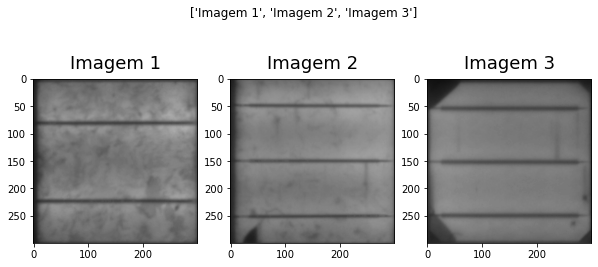

In [54]:
# Plotando múltiplas imagens com a função: showMultipleImages

imgsArray = [images[100], images[200], images[500]]
titlesArray = ['Imagem 1', 'Imagem 2', 'Imagem 3']
showMultipleImages(imgsArray, titlesArray, (8, ), 3, 1)

In [63]:
# Classificando as imagens das células de silício monocristalino (mono) e policristalino (poly):

x = images
y = types
y[y == 'mono'] = 0
y[y == 'poly'] = 1
class_names = ['mono','poly']

